In [6]:
from transformers import pipeline
import csv
from tqdm import tqdm

classifier = pipeline("text-classification", model="facebook/bart-large-mnli")

# Define the input and output CSV file names
input_csv_file = "data scraping/mapped_summaries_l3.csv"

# Read from the input CSV file
with open(input_csv_file, mode='r') as infile:
    reader = csv.DictReader(infile)
    data = [row for row in reader]

# Process the data and create sentence pairs
sentence_pairs = [(row['summary_sentence'], row['text_chunk']) for row in data[:1500]]
                  
# Run the classifier on the sentence pairs
results = []

for hypothesis, premise in tqdm(sentence_pairs, total=len(sentence_pairs), desc="Processing Claims"):
    claim_length = len(classifier.tokenizer.encode(hypothesis, add_special_tokens=True))
    max_premise_length = classifier.tokenizer.model_max_length - claim_length - 1
    # Ensure max_premise_length is not negative
    if max_premise_length < 0:
        raise ValueError("max_premise_length is negative. Adjust the length of hypothesis or check the tokenizer settings.")
    premise_encoded = classifier.tokenizer.encode(premise, add_special_tokens=True, truncation=True, max_length=max_premise_length)
    truncated_premise = classifier.tokenizer.decode(premise_encoded, skip_special_tokens=True)
            
    result = classifier(f"{truncated_premise} {classifier.tokenizer.sep_token} {hypothesis}")
    results.append({
        "premise": premise,
        "hypothesis": hypothesis,
        "labels": result[0]['label'],
        "scores": result[0]['score']
    })

# Print the results
for res in results:
    print(f"Premise: {res['premise']}")
    print(f"Hypothesis: {res['hypothesis']}")
    print(f"Label: {res['labels']}")
    print(f"Score: {res['scores']}\n")


Processing Claims: 100%|██████████| 1500/1500 [16:27<00:00,  1.52it/s]

Premise: THE BIRTH OF A WOMAN-CHILD

"Whose cradle's that?" the sick woman's thin querulous tones arrested
the man at the threshold.

"Onie Dillard's," he replied hollowly from the depths of the crib which
he carried upside down upon his head, like some curious kind of
overgrown helmet.

"Now, why in the name o' common sense would ye go and borry a broken
cradle?" came the wail from the bed. "I 'lowed you'd git Billy
Spinner's, an' hit's as good as new."

Uncle Pros set the small article of furniture down gently.

"Don't you worry yo'se'f, Laurelly," he said enthusiastically. Pros
Passmore, uncle of the sick woman and mainstay of the forlorn little
Consadine household, was always full of enthusiasm. "Just a few nails
and a little wrappin' of twine'll make it all right," he informed his
niece. "I stopped a-past and borried the nails and the hammer from Jeff
Dawes; I mighty nigh pounded my thumb off knockin' in nails with a rock
an' a sad-iron last week."

"Looks like nobody ain't got no

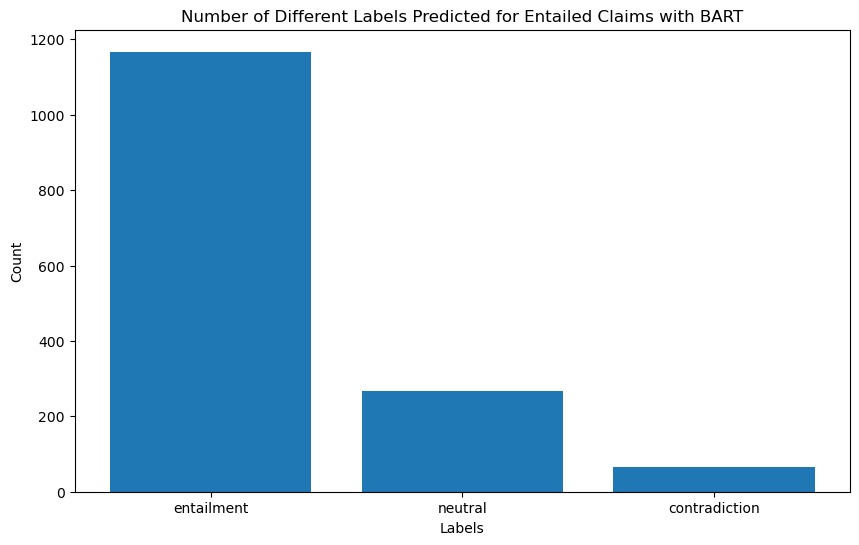

In [7]:
import matplotlib.pyplot as plt

# Count the number of different labels
label_counts = {}
for res in results:
    if res['labels'] is not None:
        label = res['labels']
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Number of Different Labels Predicted for Entailed Claims with BART')
plt.show()

In [8]:
from transformers import pipeline
import csv
from tqdm import tqdm

classifier = pipeline("text-classification", model="facebook/bart-large-mnli")

# Define the input and output CSV file names
input_csv_file = "data scraping/negative_claims.csv"

# Read from the input CSV file
with open(input_csv_file, mode='r') as infile:
    reader = csv.DictReader(infile)
    data = [row for row in reader]

# Process the data and create sentence pairs
sentence_pairs = [(row['summary_sentence'], row['text_chunk']) for row in data]
                  
# Run the classifier on the sentence pairs
results = []

for hypothesis, premise in tqdm(sentence_pairs, total=len(sentence_pairs), desc="Processing Claims"):
    claim_length = len(classifier.tokenizer.encode(hypothesis, add_special_tokens=True))
    max_premise_length = classifier.tokenizer.model_max_length - claim_length - 1
    # Ensure max_premise_length is not negative
    if max_premise_length < 0:
        raise ValueError("max_premise_length is negative. Adjust the length of hypothesis or check the tokenizer settings.")
    premise_encoded = classifier.tokenizer.encode(premise, add_special_tokens=True, truncation=True, max_length=max_premise_length)
    truncated_premise = classifier.tokenizer.decode(premise_encoded, skip_special_tokens=True)
            
    result = classifier(f"{truncated_premise} {classifier.tokenizer.sep_token} {hypothesis}")
    results.append({
        "premise": premise,
        "hypothesis": hypothesis,
        "labels": result[0]['label'],
        "scores": result[0]['score']
    })

# Print the results
for res in results:
    print(f"Premise: {res['premise']}")
    print(f"Hypothesis: {res['hypothesis']}")
    print(f"Label: {res['labels']}")
    print(f"Score: {res['scores']}\n")

Processing Claims: 100%|██████████| 420/420 [04:23<00:00,  1.59it/s]

Premise: rich, broken light from the cavernous fireplace filled the smoke-browned
interior full of shadow and shine in which things leaped oddly into
life, or dropped out of knowledge with a startling effect. The four
corners of the log room were utilized, three of them for beds, made by
thrusting two poles through auger holes bored in the logs of the walls,
setting a leg at the corner where these met and lacing the bottom with
hickory withes. The fourth had some rude planks nailed in it for a
table, and a knot-hole in one of the logs served the primitive purpose
of a salt-cellar. A pack of gaunt hounds quarrelled under the floor, and
the sick woman stirred uneasily on her bed and expressed a wish that her
emissaries would return.

Uncle Pros had taken the cradle to a back door to get the last of the
evening sun upon his task. One would not have thought that he could hear
what the women were saying at this distance, but the old hunter's ears
were sharp.

"Never you mind, Laurelly," he 

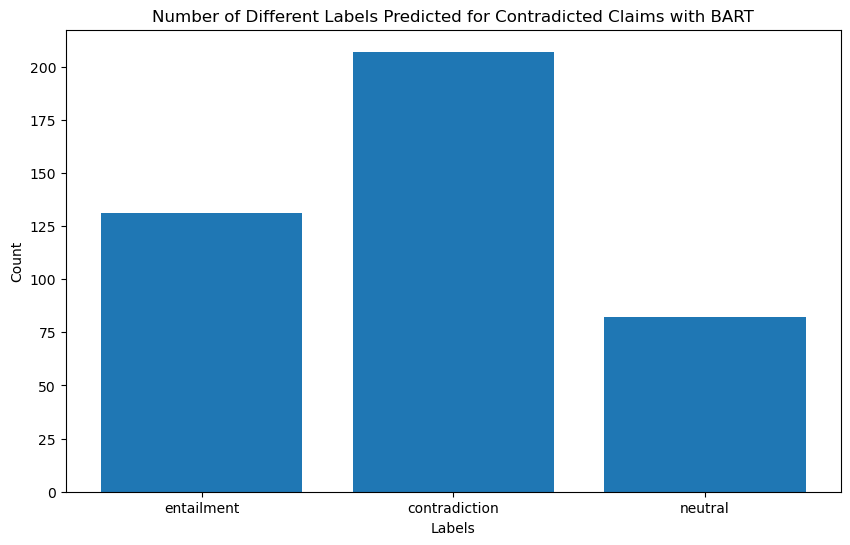

In [9]:
import matplotlib.pyplot as plt

# Count the number of different labels
label_counts = {}
for res in results:
    if res['labels'] is not None:
        label = res['labels']
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Number of Different Labels Predicted for Contradicted Claims with BART')
plt.show()

In [14]:
classifier = pipeline("text-classification", model="FacebookAI/roberta-large-mnli")

# Define the input and output CSV file names
input_csv_file = "data scraping/negative_claims.csv"

# Read from the input CSV file
with open(input_csv_file, mode='r') as infile:
    reader = csv.DictReader(infile)
    data = [row for row in reader]

# Process the data and create sentence pairs
sentence_pairs = [(row['summary_sentence'], row['text_chunk']) for row in data]
                  
# Run the classifier on the sentence pairs
results = []

for hypothesis, premise in tqdm(sentence_pairs, total=len(sentence_pairs), desc="Processing Claims"):
    claim_length = len(classifier.tokenizer.encode(hypothesis, add_special_tokens=True))
    max_premise_length = classifier.tokenizer.model_max_length - claim_length - 1
    # Ensure max_premise_length is not negative
    if max_premise_length < 0:
        raise ValueError("max_premise_length is negative. Adjust the length of hypothesis or check the tokenizer settings.")
    premise_encoded = classifier.tokenizer.encode(premise, add_special_tokens=True, truncation=True, max_length=max_premise_length)
    truncated_premise = classifier.tokenizer.decode(premise_encoded, skip_special_tokens=True)
            
    result = classifier(f"{truncated_premise} {classifier.tokenizer.sep_token} {hypothesis}")
    results.append({
        "premise": premise,
        "hypothesis": hypothesis,
        "labels": result[0]['label'],
        "scores": result[0]['score']
    })

# Print the results
for res in results:
    print(f"Premise: {res['premise']}")
    print(f"Hypothesis: {res['hypothesis']}")
    print(f"Label: {res['labels']}")
    print(f"Score: {res['scores']}\n")

Some weights of the model checkpoint at FacebookAI/roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Processing Claims: 100%|██████████| 420/420 [03:53<00:00,  1.80it/s]

Premise: rich, broken light from the cavernous fireplace filled the smoke-browned
interior full of shadow and shine in which things leaped oddly into
life, or dropped out of knowledge with a startling effect. The four
corners of the log room were utilized, three of them for beds, made by
thrusting two poles through auger holes bored in the logs of the walls,
setting a leg at the corner where these met and lacing the bottom with
hickory withes. The fourth had some rude planks nailed in it for a
table, and a knot-hole in one of the logs served the primitive purpose
of a salt-cellar. A pack of gaunt hounds quarrelled under the floor, and
the sick woman stirred uneasily on her bed and expressed a wish that her
emissaries would return.

Uncle Pros had taken the cradle to a back door to get the last of the
evening sun upon his task. One would not have thought that he could hear
what the women were saying at this distance, but the old hunter's ears
were sharp.

"Never you mind, Laurelly," he 

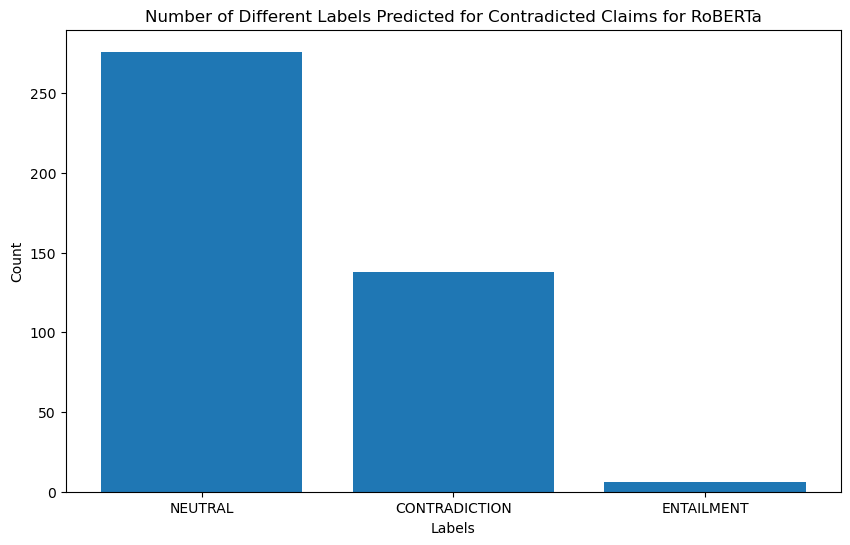

In [15]:
import matplotlib.pyplot as plt

# Count the number of different labels
label_counts = {}
for res in results:
    if res['labels'] is not None:
        label = res['labels']
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Number of Different Labels Predicted for Contradicted Claims for RoBERTa')
plt.show()